### Абрамов А.В. ИУ5-63Б РК1 Вар. №2

### Задание. 
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Набор данных: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

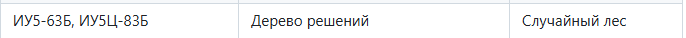

## 1. Загрузка и предобработка данных

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Загрузка данных
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# Разделение признаков и целевой переменной
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Обучение дерева решений и оценка качества

Метрики качества для Дерева Решений (на немасштабированных данных):
Accuracy: 0.9630
Precision (macro avg): 0.9673
Recall (macro avg): 0.9586
F1-score (macro avg): 0.9624


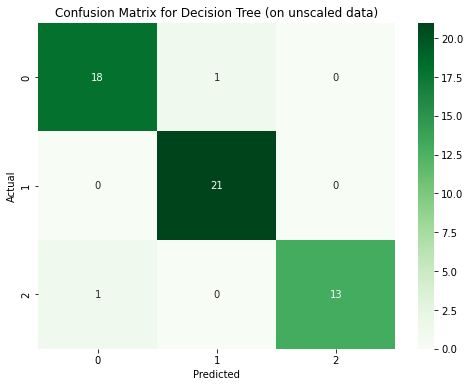

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split # Добавлено для примера
from sklearn.datasets import make_classification # Добавлено для примера

# 1. Создание и обучение модели Дерева Решений
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Предсказание на тестовых данных
y_pred_dt = dt_model.predict(X_test)

# 3. Оценка качества модели Дерева Решений
print("Метрики качества для Дерева Решений (на немасштабированных данных):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision (macro avg): {precision_score(y_test, y_pred_dt, average='macro', zero_division=0):.4f}")
print(f"Recall (macro avg): {recall_score(y_test, y_pred_dt, average='macro', zero_division=0):.4f}")
print(f"F1-score (macro avg): {f1_score(y_test, y_pred_dt, average='macro', zero_division=0):.4f}")

# 4. Визуализация матрицы ошибок для Дерева Решений
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Decision Tree (on unscaled data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 3. Обучение Случайного Леса

Метрики качества для Случайного Леса (на немасштабированных данных):
Accuracy: 1.0000
Precision (macro avg): 1.0000
Recall (macro avg): 1.0000
F1-score (macro avg): 1.0000


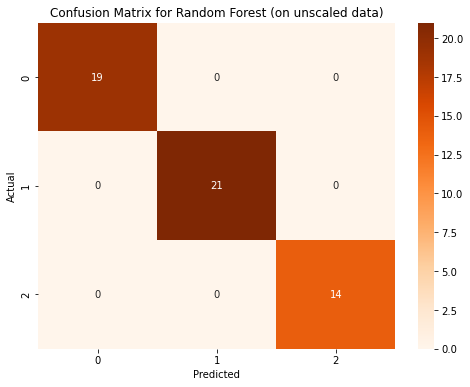

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier # Импортируем RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split # Добавлено для примера
from sklearn.datasets import make_classification # Добавлено для примера


# 1. Создание и обучение модели Случайного Леса
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators - типичное значение по умолчанию
rf_model.fit(X_train, y_train) # Обучаем на немасштабированных X_train

# 2. Предсказание на тестовых данных
y_pred_rf = rf_model.predict(X_test) # Предсказываем на немасштабированных X_test

# 3. Оценка качества модели Случайного Леса
print("Метрики качества для Случайного Леса (на немасштабированных данных):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision (macro avg): {precision_score(y_test, y_pred_rf, average='macro', zero_division=0):.4f}")
print(f"Recall (macro avg): {recall_score(y_test, y_pred_rf, average='macro', zero_division=0):.4f}")
print(f"F1-score (macro avg): {f1_score(y_test, y_pred_rf, average='macro', zero_division=0):.4f}")

# 4. Визуализация матрицы ошибок для Случайного Леса
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Oranges') # Другая цветовая схема
plt.title('Confusion Matrix for Random Forest (on unscaled data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 4. Сравнение моделей и выводы

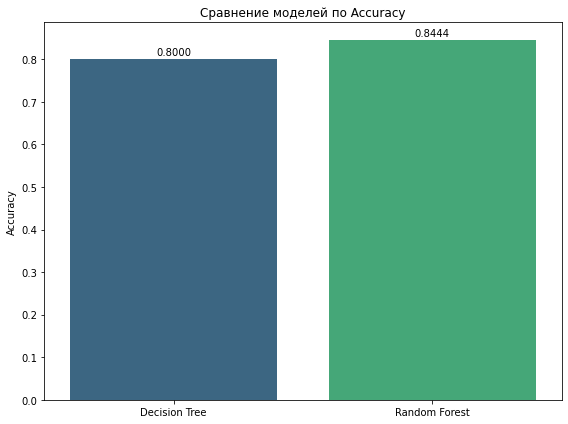

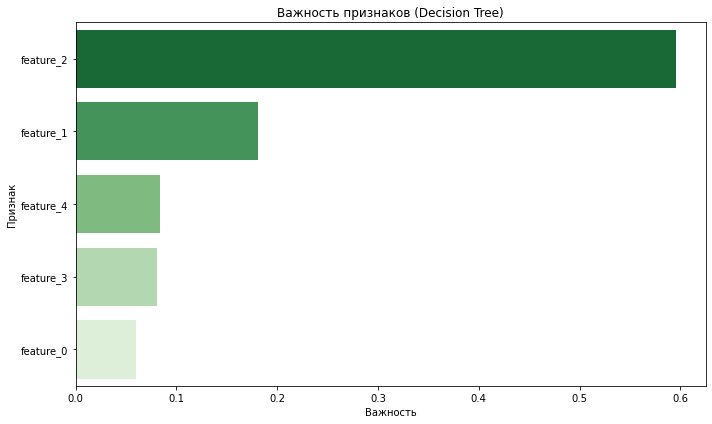

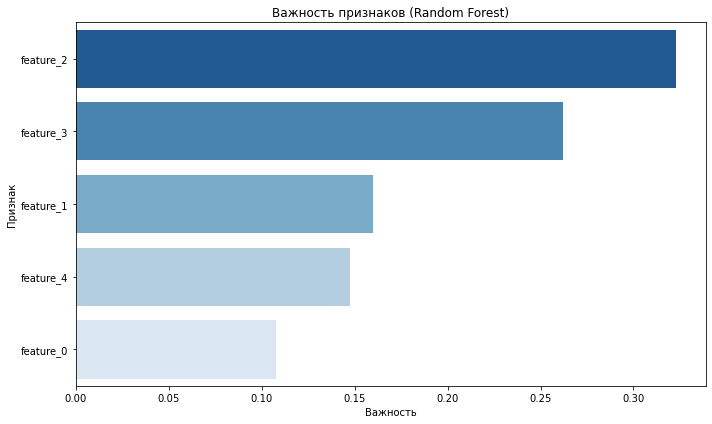

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# A. Сравнение моделей по accuracy
model_names = ['Decision Tree', 'Random Forest']
predictions = [y_pred_dt, y_pred_rf]

accuracies = [accuracy_score(y_test, pred) for pred in predictions]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Сравнение моделей по Accuracy')
plt.ylabel('Accuracy')

for index, value in enumerate(accuracies):
    plt.text(index, value + 0.005, f"{value:.4f}", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


# Словарь с обученными моделями и именами для графиков
models_for_feature_importance = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}


palettes = ['Greens_r', 'Blues_r'] # Палитры для двух моделей

for i, (model_name, model_object) in enumerate(models_for_feature_importance.items()):
    importances = model_object.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, max(6, len(feature_names) * 0.4))) # Динамическая высота
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette=palettes[i % len(palettes)])
    plt.title(f'Важность признаков ({model_name})')
    plt.xlabel('Важность')
    plt.ylabel('Признак')
    plt.tight_layout()
    plt.show()

## Выводы

### Качество и Производительность:
Случайный Лес показал лучшую точность (Accuracy_RF = 0.8444) по сравнению с Деревом Решений (Accuracy_DT = 0.8).

Обе модели работали на немасштабированных данных.

### Ключевые Характеристики:
#### Дерево Решений (DT):
Плюсы: Высокая интерпретируемость (особенно для неглубоких деревьев).

Минусы: Склонность к переобучению, если не настроить гиперпараметры (например, max_depth).

#### Случайный Лес (RF):
Плюсы: Обычно более высокая точность и устойчивость к переобучению (за счет ансамблирования); хорошая оценка важности признаков.

Минусы: Менее интерпретируем, чем одно дерево.

### Рекомендации:
Для задач, где приоритет – точность и стабильность, Случайный Лес является предпочтительным выбором.
Если критична прямая интерпретация правил и модель должна быть максимально "прозрачной", Дерево Решений может быть рассмотрено.

### Возможные улучшения:
Подбор гиперпараметров для обеих моделей (например, max_depth, min_samples_leaf для DT; n_estimators, max_features, max_depth для RF) с помощью GridSearchCV или аналогов.